0.09102483247073859
0.3122830960447432
0.05723308361638335
0.03680941485457701
1.4009653932488173
0.13370191296792275
0.17574671325515565
0.11793782589683599
0.19974983198246615
0.15809431250982722
0.5890289263285827
0.12533986099916275
0.0073623297307621564
0.3532262817277708
0.025199624231854543
0.4292149635049436
0.006500587524633734
0.1824864704850288
0.14589277935340683
0.3618406133617657
0.38668599928212505
0.04406063614056198
0.2991899591757843
0.299964992342558
0.4864862823888826
0.28606827322784867
0.11351874535650511
0.047215954375417965
1.1677985061245677
0.04512010203637559
0.030487494856712285
0.35205348066926756
0.49566744392320017
0.3460567312891304
0.21750273963805597
0.2015383767841758
1.3573242108472763
0.45616431323616624
0.06878276252224393
0.3137325847683286
0.3818702208085354
0.19489714086599103
0.6423869589516317
0.2824350575744837
0.35895513055130396
0.24645777752130965
0.1441368731121698
0.1943487732087418
0.4937972041725112
0.9665135858875792
0.244870362509207

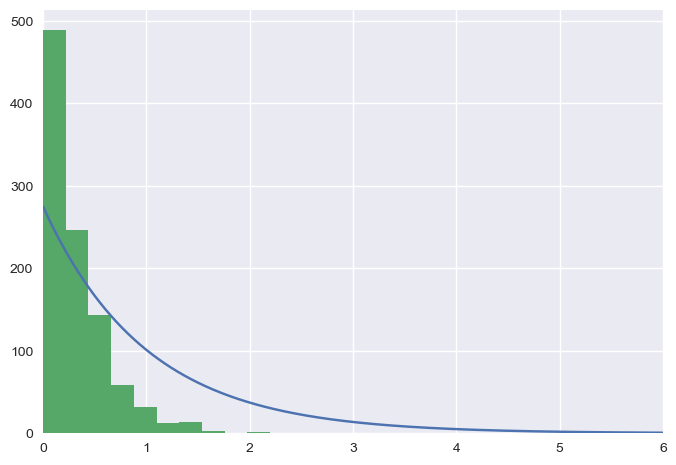

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from scipy.stats import norm
import scipy.integrate as integrate

#how to include optional arguments in a function
muA = 1.673/100 #cm^-1/100
muS = 312.0/100 # cm^-1/100
g = 0.90
nt = 1.33
Nphotons = 10000#* set number of photons in simulation */
radial_size = 2.0#* cm, total range over which bins extend */
NR = 1000#* set number of bins. */

def step_size_txt():
    random = np.random.uniform(0,1)
    coef = muA + muS
    step_size = -np.log(random)/coef
    print(step_size)
    return step_size
def p(x1,opt):
    x1 = x1
    x2 = opt
    distribution_function = lambda x: norm.pdf(x, 0.1)


    print('probability to fall between {0} and {1} :'.format(x1, x2), integrate.quad(distribution_function, x1, x2)[0])
    step = 0.001
    whole_x = np.arange(-4, 4, step)
    whole_y = list(map(distribution_function, whole_x))

    needed_x = np.arange(x1, x2, step)
    needed_y = list(map(distribution_function, needed_x))
    plt.plot(whole_x, whole_y)
    plt.fill_between(needed_x, needed_y)


def random(coef):
    random = np.random.uniform(0,6)
    x = 1-np.exp(-random*coef)
    return random
    # p(x1, x2)
def step_size(n, coef):
    random = np.random.uniform(0,6)
    step_size = -np.log(random)/(muA + muS)
    
    return step_size

def step_hist(n, coef, plot=False):
    histogram = np.array([])
    for i in range(n):
        histogram = np.append(histogram, step_size_txt())
    if plot:

        plt.hist(histogram, )
    return histogram
def curve_plot(n, coef, plot=False):
    x = np.arange(0, 6, 6/n)
    ds1 = 0.275

    function = lambda x: 1000*np.exp(-x)*ds1/1
    return x, function(x)

plt.plot(curve_plot(1000, 1)[0], curve_plot(1000, 1)[1])

x = step_hist(1000, .275, plot=True)


print(np.mean(x))


plt.xlim(0, 6)
plt.show()

9.644250971660632
3721.6039785316666
2.3194175656714506
1427.855189861344
0.7022173481200875
679.1626920415231
0.345166696086181
370.0839678761747
0.26633590770620813
221.49680306642568
0.24893139335730857
141.98886213168814
0.24508876884541153
95.92159222552088
0.244240381878477
67.53733749052974


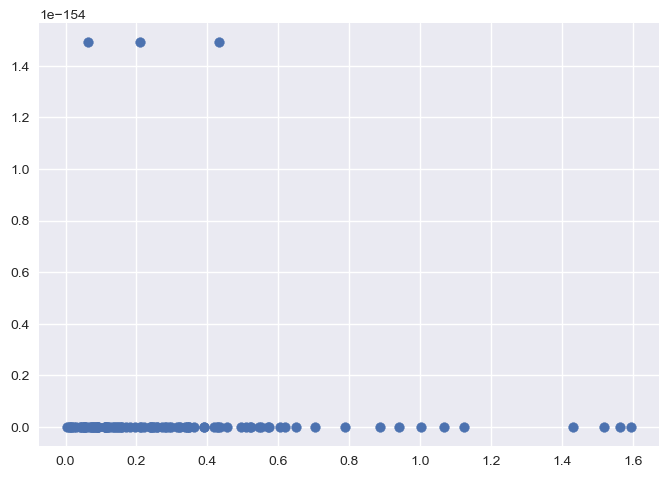

In [6]:
# nm = 400
# muBaseLine = 0.244 + 85.3*np.exp(-(nm - 154)/66.2)
# print(muBaseLine)
bl = np.empty(100)
mel = np.empty(100)
epi = np.empty(100)

fmel = 10
x = np.empty(100)
for nm in range(300,1100,100):
    # 0.244 + 85.3exp(-(nm - 154)/66.2)
    muBaseLine = 0.244 + 85.3*np.exp(-(nm - 154)/66.2)
    #(6.6 x 10^11)(nm^(-3.33))
    muMelanin = (6.6*10**11)*(nm**(-3.33))
    #mua.epi  =  (f.mel)(mua.mel)  +  (1 - f.mel)(mua.skinbaseline)
    muEpi = (fmel*muMelanin) + ((1-fmel)*muBaseLine)
    print(muBaseLine)
    print(muMelanin)
    
    np.append(bl, muBaseLine)
    np.append(mel, muMelanin)
    np.append(epi, muEpi)
    np.append(x, nm)

plt.scatter(x,epi)
plt.yscale('linear')
plt.xscale('linear')